In [1]:
import seaborn 
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVR
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,KBinsDiscretizer
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error,roc_curve,confusion_matrix,accuracy_score

In [196]:
df = pd.read_csv('predictionQuery_MHD.csv')
df.head(50)

,lon,lat,ROUTE_NUMBER,DIRECTION,BUS_STOP_ORDER_NUM,BUS_STOP_NUM_1,Current_Stop,BUS_STOP_SUB_NUM_2,BUS_STOP_NUM_2,Next_Stop,PLANNED_ROAD,REAL_ROAD,DELAY,VEHICLE_NUMBER,Current_Time,Current_Day,Current_Hour,Current_Minutes,Current_Seconds
0,21.24132,48.99196,29,P,9,531,Okružná,1,114,Grešova,500,163,42,357,1612268985879,2,13,29,45
1,21.24094,48.99245,29,P,9,531,Okružná,1,114,Grešova,500,104,-39,357,1612272661119,2,14,31,1
2,21.24141,48.99198,29,P,9,531,Okružná,1,114,Grešova,500,177,26,397,1612175425822,1,11,30,25
3,21.24131,48.99209,23,P,2,2,Na Hlavnej,1,531,Okružná,800,611,-37,405,1612179235922,1,12,33,55
4,21.24109,48.99235,29,P,9,531,Okružná,1,114,Grešova,500,118,-41,357,1612261860681,2,11,31,0
5,21.24143,48.99197,29,P,9,531,Okružná,1,114,Grešova,500,172,-43,357,1612261875688,2,11,31,15
6,21.24096,48.99245,23,P,2,2,Na Hlavnej,1,531,Okružná,800,663,64,405,1612198333055,1,17,52,13
7,21.24142,48.99195,29,P,9,531,Okružná,1,114,Grešova,500,159,-25,357,1612276261194,2,15,31,1
8,21.24114,48.99207,29,P,8,532,Floriánova,2,531,Okružná,540,540,-49,357,1612276246207,2,15,30,46
9,21.24110,48.99229,23,P,2,2,Na Hlavnej,1,531,Okružná,800,644,0,405,1612191192558,1,15,53,12


In [197]:
df.describe()

,lon,lat,ROUTE_NUMBER,BUS_STOP_ORDER_NUM,BUS_STOP_NUM_1,BUS_STOP_SUB_NUM_2,BUS_STOP_NUM_2,PLANNED_ROAD,REAL_ROAD,DELAY,VEHICLE_NUMBER,Current_Time,Current_Day,Current_Hour,Current_Minutes,Current_Seconds
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,6.530000e+02,653.000000,653.000000,653.000000,653.000000
mean,21.250254,48.990465,29.732006,7.082695,369.042879,1.026034,233.275651,681.027565,382.073507,-43.938744,382.154671,1.613106e+12,15.663093,12.817764,28.208270,28.301685
std,0.025006,0.004600,6.414384,2.981419,236.351884,0.388795,194.939893,470.767344,474.746136,171.213253,15.965808,9.567835e+08,10.704041,4.303179,13.129001,17.882523
min,21.240850,48.977770,10.000000,1.000000,2.000000,0.000000,68.000000,284.000000,0.000000,-2395.000000,344.000000,1.611761e+12,1.000000,5.000000,0.000000,0.000000
25%,21.241090,48.991970,29.000000,3.000000,69.000000,1.000000,114.000000,500.000000,136.000000,-70.000000,375.000000,1.612276e+12,5.000000,9.000000,18.000000,12.000000
50%,21.241170,48.992080,29.000000,9.000000,531.000000,1.000000,114.000000,500.000000,163.000000,-22.000000,380.000000,1.612863e+12,19.000000,13.000000,29.000000,27.000000
75%,21.241390,48.992210,29.000000,9.000000,531.000000,1.000000,531.000000,800.000000,540.000000,24.000000,397.000000,1.614075e+12,27.000000,17.000000,33.000000,45.000000
max,21.319480,48.992500,46.000000,10.000000,532.000000,2.000000,532.000000,2400.000000,2400.000000,167.000000,408.000000,1.614709e+12,31.000000,22.000000,59.000000,59.000000


In [198]:
df.isnull().sum()

lon                   0
lat                   0
ROUTE_NUMBER          0
DIRECTION             0
BUS_STOP_ORDER_NUM    0
BUS_STOP_NUM_1        0
Current_Stop          0
BUS_STOP_SUB_NUM_2    0
BUS_STOP_NUM_2        0
Next_Stop             0
PLANNED_ROAD          0
REAL_ROAD             0
DELAY                 0
VEHICLE_NUMBER        0
Current_Time          0
Current_Day           0
Current_Hour          0
Current_Minutes       0
Current_Seconds       0
dtype: int64

In [199]:
df.dtypes

lon                   float64
lat                   float64
ROUTE_NUMBER            int64
DIRECTION              object
BUS_STOP_ORDER_NUM      int64
BUS_STOP_NUM_1          int64
Current_Stop           object
BUS_STOP_SUB_NUM_2      int64
BUS_STOP_NUM_2          int64
Next_Stop              object
PLANNED_ROAD            int64
REAL_ROAD               int64
DELAY                   int64
VEHICLE_NUMBER          int64
Current_Time            int64
Current_Day             int64
Current_Hour            int64
Current_Minutes         int64
Current_Seconds         int64
dtype: object

In [200]:
def f(x):
    if(x == 'T'):
        return 0
    elif(x == 'P'):
        return 1
    elif(x == 'D'):
        return 2
    elif(x == 'Z'):
        return 3
    elif(x == 'R'):
        return 4

df['DIRECTION'] = [f(x) for x in df['DIRECTION']]


In [201]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr > 0.3)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('lon', 'ROUTE_NUMBER'),
 ('lon', 'PLANNED_ROAD'),
 ('lon', 'REAL_ROAD'),
 ('lon', 'Current_Day'),
 ('lat', 'DIRECTION'),
 ('lat', 'BUS_STOP_NUM_1'),
 ('lat', 'BUS_STOP_SUB_NUM_2'),
 ('lat', 'BUS_STOP_NUM_2'),
 ('lat', 'Current_Time'),
 ('ROUTE_NUMBER', 'PLANNED_ROAD'),
 ('ROUTE_NUMBER', 'REAL_ROAD'),
 ('ROUTE_NUMBER', 'Current_Day'),
 ('DIRECTION', 'BUS_STOP_ORDER_NUM'),
 ('DIRECTION', 'BUS_STOP_NUM_1'),
 ('DIRECTION', 'BUS_STOP_SUB_NUM_2'),
 ('DIRECTION', 'Current_Time'),
 ('BUS_STOP_ORDER_NUM', 'BUS_STOP_NUM_1'),
 ('BUS_STOP_NUM_1', 'BUS_STOP_SUB_NUM_2'),
 ('BUS_STOP_SUB_NUM_2', 'BUS_STOP_NUM_2'),
 ('PLANNED_ROAD', 'REAL_ROAD'),
 ('REAL_ROAD', 'Current_Minutes')]

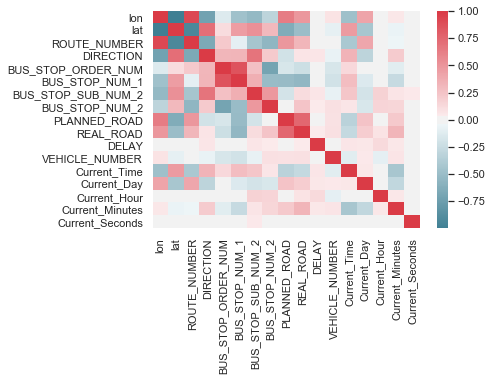

In [202]:
seaborn.set(style='white')
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
seaborn.heatmap(df.corr(),cmap=cmap)

In [203]:
def LabelEncoding(col):
    encoder = LabelEncoder()
    encoder.fit(df[col])
    list(encoder.classes_)
    return encoder.transform(df[col])

def KBinsDiscretizing(currCol):
    discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    discretizer.fit(df[currCol])
    return discretizer.transform(df[currCol])

df['Current_Stop_Encoded']=LabelEncoding('Current_Stop')
df['lon_Encoded']=LabelEncoding('lon')
df['lat_Encoded']=LabelEncoding('lat')
df['Current_Seconds_Encoded']=LabelEncoding('Current_Seconds')
df['Current_Minutes_Encoded']=LabelEncoding('Current_Minutes')
df['Current_Hour_Encoded']= LabelEncoding('Current_Hour')
df['Current_Day_Encoded']= LabelEncoding('Current_Day')


In [204]:
df = df.drop(['ROUTE_NUMBER','Current_Stop','Current_Hour','Current_Minutes',
              'Current_Seconds','lon','lat',"Destination","From",'BUS_STOP_ORDER_NUM',
              'PLANNED_ROAD','REAL_ROAD','BUS_STOP_NUM_1','BUS_STOP_SUB_NUM_2','Current_Time','Next_Stop',
              'Current_Day'],axis =1, errors='ignore')

In [205]:
corr = df.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr > 0.4)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[]

,DIRECTION,BUS_STOP_NUM_2,DELAY,VEHICLE_NUMBER,Current_Stop_Encoded,lon_Encoded,lat_Encoded,Current_Seconds_Encoded,Current_Minutes_Encoded,Current_Hour_Encoded,Current_Day_Encoded
0,1,114,42,357,4,43,15,45,24,8,1
1,1,114,-39,357,4,5,64,1,26,9,1
2,1,114,26,397,4,52,17,25,25,6,0
3,1,531,-37,405,2,42,28,55,28,7,0
4,1,114,-41,357,4,20,54,0,26,6,1
5,1,114,-43,357,4,54,16,15,26,6,1
6,1,531,64,405,2,7,64,13,44,12,0
7,1,114,-25,357,4,53,14,1,26,10,1
8,1,531,-49,357,1,25,26,46,25,10,1
9,1,531,0,405,2,21,48,12,45,10,0


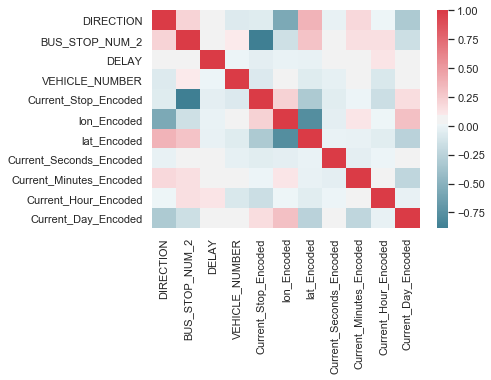

In [206]:
seaborn.heatmap(df.corr(),cmap=cmap)
df.head(10)

#### TrainTest Spit

In [207]:
train_x, test_x, train_y, test_y = train_test_split(df.drop('DELAY', axis=1), df['DELAY'], test_size=0.3, random_state=1234)

In [208]:
print(train_x.shape +  test_x.shape)

(457, 10, 196, 10)


In [209]:
print(train_y.shape +  test_y.shape)

(457, 196)


### Models

#### GridSearch for RandomForest

In [210]:
startTimeGS = datetime.now()
param_grid = {'n_estimators': [10,15,20,25,100,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=10)
grid_rf.fit(train_x, train_y)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.score
print('Random forest Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

Random forest Grid Search with non-redundant variables took [ 0:02:05.227992 ] seconds.


In [211]:
print(bestModel)
print(bestParameters)
gridScores

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
{'n_estimators': 20}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False)

In [212]:
regr = RandomForestRegressor(n_estimators = bestParameters.get('n_estimators'),
                             random_state = 1234)
regr.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
#y_pred = cross_val_predict(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)


y_pred_svr = regr.predict(test_x)
regr.score(test_x,test_y)

-0.05266029162289414
0.840529822113863
[-0.40496483 -0.00568059  0.42902018  0.35456554  0.23305198  0.40693463
  0.32750869  0.33406066  0.27015182 -2.47125101]


0.05794839133251273

In [213]:
y_pred= y_pred_svr
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 45.49719387755103
Mean Squared Error (MSE): 17440.355701530614
Root Mean Squared Error (RMSE): 132.06193888297497
Explained Variance Score: 0.0613162411645195
Max Error: 1302.95
Median Absolute Error: 16.299999999999997
R^2: 0.05794839133251273


#### GridSearch for Linear Regression

In [214]:
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv = 10)
grid_search.fit(train_x, train_y)

bestModel = grid_search.best_estimator_
bestParameters = grid_search.best_params_
gridScores = grid_search.score
print(bestModel)
print(bestParameters)
gridScores

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [215]:
regressor = LinearRegression(fit_intercept=bestParameters.get('fit_intercept'),
                             normalize=bestParameters.get('normalize'), 
                             copy_X=bestParameters.get('copy_X'))  
regressor.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(regressor, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
#y_pred = cross_val_predict(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)


y_pred = regressor.predict(test_x)
regressor.score(test_x,test_y)

-0.05056728356169521
0.07868203098050779
[-0.18654472  0.04494932  0.02400637 -0.04829732 -0.04710064 -0.1678759
 -0.02443758 -0.02604411  0.04442076 -0.11874902]


0.00709186152714858

In [216]:
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 71.22755527371487
Mean Squared Error (MSE): 18381.870966077135
Root Mean Squared Error (RMSE): 135.57975868866686
Explained Variance Score: 0.017057791836089242
Max Error: 1497.6521962516156
Median Absolute Error: 51.59502958101913
R^2: 0.00709186152714858


#### GridsearchCV for SVR

In [217]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 0.001]}
grid_search = GridSearchCV(SVR(), param_grid, cv = 10)
grid_search.fit(train_x, train_y)

bestModel = grid_search.best_estimator_
bestParameters = grid_search.best_params_
gridScores = grid_search.score
print(bestModel)
print(bestParameters)
gridScores

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
{'C': 100, 'gamma': 0.001}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

#### SVR

In [218]:
svr_rbf = SVR(kernel='rbf', 
              C=bestParameters.get('C'),
              gamma=bestParameters.get('gamma'), epsilon=1)
svr_rbf.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(svr_rbf, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
#y_pred = cross_val_predict(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)
y_pred_svr = svr_rbf.predict(test_x)
svr_rbf.score(test_x,test_y)

0.0029405086788718672
0.10182448261586374
[ 0.04721547 -0.16247761 -0.04713771  0.04373505  0.16239809 -0.05737804
 -0.07531208 -0.10081662  0.13683655  0.08234198]


-0.053564497326046956

In [219]:
y_pred= y_pred_svr
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 66.93838662837948
Mean Squared Error (MSE): 19504.8120706051
Root Mean Squared Error (RMSE): 139.65962935152413
Explained Variance Score: -0.050569065237045185
Max Error: 1610.9070581632086
Median Absolute Error: 47.6557100000698
R^2: -0.053564497326046956


#### GridSearch for XGBoost model

In [220]:
param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10],
              'n_estimators': [10,15,20,25,100,500,600,700,800,900,1000]
             }
grid_search = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), param_grid, cv = 10)
grid_search.fit(train_x, train_y)

bestModel = grid_search.best_estimator_
bestParameters = grid_search.best_params_
gridScores = grid_search.score
print(bestModel)
print(bestParameters)
gridScores

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
{'max_depth': 10, 'n_estimators': 10}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  

#### XGBoost model

In [221]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.8, 
                          learning_rate = 1,
                          max_depth = bestParameters.get('max_depth'), 
                          alpha = 10, 
                          n_estimators = bestParameters.get('n_estimators'))
xg_reg.fit(train_x,train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores= cross_val_score(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
#y_pred = cross_val_predict(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)

preds_y = xg_reg.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, preds_y))
print(xg_reg.score(test_x,test_y))

0.49618114140054814
0.3944631284499587
[ 0.86314184  0.82918566  0.96980312  0.62400977  0.26926715  0.37174649
  0.62749578  0.18656114  0.65431829 -0.43371784]
0.8909121189362155


In [222]:
y_pred= preds_y
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 27.69753853763853
Mean Squared Error (MSE): 2019.561806353435
Root Mean Squared Error (RMSE): 44.93953500375182
Explained Variance Score: 0.8909142069252721
Max Error: 215.6977653503418
Median Absolute Error: 18.163601875305176
R^2: 0.8909121189362154


#### GridSearch for DecisionTree

In [223]:
startTimeGS = datetime.now()
param_grid = {'criterion':['mse', 'friedman_mse', 'mae'],
              'splitter':['best','random']}

grid_rf = GridSearchCV(DecisionTreeRegressor(random_state =  0), param_grid, cv=10)
grid_rf.fit(train_x, train_y)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.score
print('MLPRegressor Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

MLPRegressor Grid Search with non-redundant variables took [ 0:00:00.540452 ] seconds.


In [224]:
print(bestModel)
print(bestParameters)
gridScores

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')
{'criterion': 'mse', 'splitter': 'best'}


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'splitter': ['best', 'random']},
             pre_dispatch='2*n_jobs', 

#### DecisionTree

In [225]:
regr = DecisionTreeRegressor(criterion = bestParameters.get('criterion'),
                             splitter = bestParameters.get('splitter'))
regr.fit(train_x, train_y)
folds = KFold(n_splits = 10, shuffle = True, random_state = 1234)
scores = cross_val_score(regr, df.drop('DELAY', axis=1), df['DELAY'], cv=folds,scoring='r2')
#y_pred = cross_val_predict(xg_reg, df.drop('DELAY', axis=1), df['DELAY'], cv=folds)
print(scores.mean())
print(scores.std())
print(scores)


y_pred_svr = regr.predict(test_x)
regr.score(test_x,test_y)

-1.4758037905147474
4.101661154677013
[-11.29409936   0.77630124   0.98035284   0.50031305   0.49487763
   0.45826936   0.29955596   0.28249845   0.4765465   -7.73265357]


-0.6262854456426152

In [226]:
y_pred= y_pred_svr
y_true=test_y
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 37.974489795918366
Mean Squared Error (MSE): 30107.688775510203
Root Mean Squared Error (RMSE): 173.51567299673596
Explained Variance Score: -0.6213738136753242
Max Error: 2350.0
Median Absolute Error: 16.0
R^2: -0.6262854456426152
